In [2]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load celeb faces (from https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)
data_dir = './faces/'
filenames = [name for name in os.listdir(data_dir)
             if os.path.splitext(name)[-1] == '.jpg']
#filenames
for filename in filenames:
    print(filename)

000001.jpg
000002.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
000011.jpg
000012.jpg
000013.jpg
000014.jpg
000015.jpg
000016.jpg
000017.jpg
000018.jpg
000019.jpg
000020.jpg
000021.jpg
000022.jpg
000023.jpg
000024.jpg
000025.jpg
000026.jpg
000027.jpg
000028.jpg
000029.jpg
000030.jpg


In [7]:
batch_size = 30
batch = np.zeros((batch_size, 218, 178, 3), dtype="uint8")

In [8]:
for i, filename in enumerate(filenames):
    img_t = imageio.imread(os.path.join(data_dir, filename))
    img_t = img_t[:,:,:3] # (R,G,B) only
    batch[i] = img_t

In [9]:
for i, filename in enumerate(filenames):
    img_t = imageio.imread(os.path.join(data_dir, filename))
    img_t = img_t[:,:,:3] # (R,G,B) only; the range of R, G, and B is from 0 to 255
    faces[i] = img_t

faces[0].shape

(218, 178, 3)

In [ ]:
plt.imshow(faces[0])

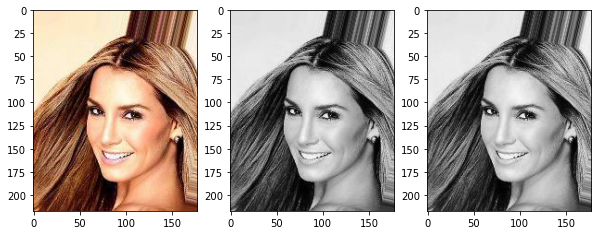

In [10]:
# simple image processing demo : convert color image to grey image
img1 = np.zeros((218, 178, 3), dtype = np.uint8)
img2 = np.zeros((218, 178, 3), dtype = np.uint8)
index = 0
for i in range(218):
    for j in range(178):
        avg1 = 0.243*faces[index][i,j,0] + 0.41*faces[index][i,j,1] + 0.347*faces[index][i,j,2]
        avg2 = (1/3)*faces[index][i,j,0] + (1/3)*faces[index][i,j,1] + (1/3)*faces[index][i,j,2]
        img1[i,j, 0] = img1[i,j, 1] = img1[i,j,2] = avg1
        img2[i,j, 0] = img2[i,j, 1] = img2[i,j,2] = avg2

plt.figure(figsize=(10,4))
plt.subplot(1, 3, 1)
plt.imshow(faces[index])
plt.subplot(1,3, 2)
plt.imshow(img1)
plt.subplot(1,3, 3)
plt.imshow(img2)

In [11]:
gray_faces = np.fromfile ("./faces/celebA_gray_lowres.202599_55_45_32.bin",dtype = np.float32)

In [12]:
gray_faces = gray_faces.reshape(202599,55*45)

In [13]:
mean_face = gray_faces.mean(0)

In [14]:
mean_face = mean_face.reshape(55,45)

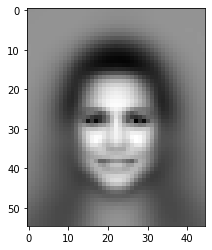

In [15]:
plt.imshow(mean_face, cmap='gray')

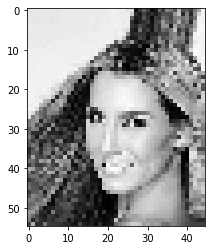

In [17]:
plt.imshow(gray_faces[0].reshape(55,45), cmap=plt.cm.gray)

## celeba face data conversion


In [ ]:
import os
import array as ar
import numpy as np
from scipy.misc import imread
from scipy.linalg import svd

# specifiy the CelebA folder
dirname = "./data/img_align_celeba/"

files = [filename for (dirpath, dirnames, filenames) in os.walk(dirname)
                  for filename in filenames if filename[-4:] == ".jpg"]

if len(files) == 0:
    print ("ERROR: goto folder im_align_celeba and inspect the README file")
    import sys
    sys.exit(1)

# if you want to subsample in index space
# files = files[::10]

# downsample the resolution by 4
subx, suby = 4, 4
dimx, dimy = int((218+subx-1)/subx), int((178+suby-1)/suby)

data = np.zeros((len(files), dimx*dimy), dtype=np.float32)

for index, filename in enumerate(files):
    if index % 1000 == 0:
        print (index)
    data[index] = np.mean(imread(dirname+filename), axis=2)[::subx,::suby].flatten()

with open("celebA_gray_lowres.%d_%d_%d_32.bin" % (data.shape[0], dimx, dimy), "wb") as f:
    f.write(ar.array("f", data.flatten()))